# SEER Breast Cancer

---

## Intro
    This dataset of breast cancer patients was obtained from the 2017 November update of the SEER Program of the NCI, which provides information on population-based cancer statistics. The dataset involved female patients with infiltrating duct and lobular carcinoma breast cancer (SEER primary cites recode NOS histology codes 8522/3) diagnosed in 2006-2010. Patients with unknown tumour size, examined regional LNs, positive regional LNs, and patients whose survival months were less than 1 month were excluded; thus, 4024 patients were ultimately included.


In [14]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable

original_data: pd.DataFrame = pd.read_csv('./data/seer_breast_cancer_dataset.csv', sep=',')
original_data

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,White,Married (including common law),NaN,T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),NaN,T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive


# SEER Breast Cancer

---

### References
Source: https://ieee-dataport.org/open-access/seer-breast-cancer-data

---



# The answer to points 1 and 2 will probably be similar to what you got in Pt1

## 1. Dataset import

---

## a) Explanation of the context. What is this data? Put references.

    This dataset of breast cancer patients was obtained from the 2017 November
    update of the SEER Program of the NCI, which provides information on
    population-based cancer statistics. The dataset involved female patients with
    infiltrating duct and lobular carcinoma breast cancer (SEER primary cites
    recode NOS histology codes 8522/3) diagnosed in 2006-2010. Patients with
    unknown tumour size, examined regional LNs, positive regional LNs, and patients
    whose survival months were less than 1 month were excluded; thus, 4024 patients
    were ultimately included.


## b) Explain the columns. 
(For further information, please read the README.md file in the root directory.)

### AGE
    This data item represents the age of the patient at diagnosis for this cancer.
    The code represents the patient’s actual age in years.

--- 

### RACE
    In this dataset the accuracy of the race is quiet questionable, because only listed the followings:
    - White
    - Black
    - Other (American Indian/AK Native, Asian...)

    We will pass through this, because even genetically it is relevant, not affecting the information what the data set provides us.

--- 

### MARITAL STATUS

    Marital status at diagnosis:

    This data item identifies the patient’s marital status at the time of diagnosis
    for the reportable tumor.

--- 

### T STAGE

    Tumour describes the size of the tumour (area of cancer). This is a simplified description of the T stage.

- T1 means that the tumour is 2 centimetres (cm) across or less.

- T2 means that the tumour is more than 2 centimetres but no more than 5 centimetres across.

- T3 means the tumour is bigger than 5 centimetres across.

- T4 is divided into 4 groups ( T4a, T4b, T4c, T4d), which can mean to where the cancer has spread, and what are the typical effects of each.

--- 

### N STAGE

    N categories for breast cancer. N followed by a number from 0 to 3 indicates whether the cancer has spread to lymph nodes near the breast and, if so, how many lymph nodes are involved.

- N1: Cancer has spread to 1 to 3 axillary (underarm) lymph node(s), and/or cancer is found in internal mammary lymph nodes (those near the breast bone) on sentinel lymph node biopsy.

- N2: Cancer has spread to 4 to 9 lymph nodes under the arm, or cancer has enlarged the internal mammary lymph nodes.

- N3: Either cancer is found in at least one axillary lymph node (with at least one area of cancer spread greater than 2 mm) and has enlarged the internal mammary lymph nodes, or cancer has spread to 4 or more axillary lymph nodes (with at least one area of cancer spread greater than 2 mm), and to the internal mammary lymph nodes on sentinel lymph node biopsy.

---

### 6TH STAGE

    Doctors assign the stage of the cancer by combining the T, N, and M classifications (see above), the tumor grade, and the results of ER/PR and HER2 testing.

##### Stage 0: 
    Stage zero (0) describes disease that is only in the ducts of the breast tissue and has not spread to the surrounding tissue of the breast. It is also called non-invasive or in situ cancer (Tis, N0, M0).

##### Stage IA: 
    The tumor is small, invasive, and has not spread to the lymph nodes (T1, N0, M0).

##### Stage IB: 
    Cancer has spread to the lymph nodes and the cancer in the lymph node is larger than 0.2 mm but less than 2 mm in size. There is either no evidence of a tumor in the breast or the tumor in the breast is 20 mm or smaller (T0 or T1, N1mi, M0).

##### Stage IIA: Any 1 of these conditions:

    - There is no evidence of a tumor in the breast, but the cancer has spread to 1 to 3 axillary lymph nodes. It has not spread to distant parts of the body (T0, N1, M0). 
    
    - The tumor is 20 mm or smaller and has spread to 1 to 3 axillary lymph nodes (T1, N1, M0).
    
    - The tumor is larger than 20 mm but not larger than 50 mm and has not spread to the axillary lymph nodes (T2, N0, M0).

##### Stage IIB: 

Either of these conditions:

    - The tumor is larger than 20 mm but not larger than 50 mm and has spread to 1 to 3 axillary lymph nodes (T2, N1, M0).

    - The tumor is larger than 50 mm but has not spread to the axillary lymph nodes (T3, N0, M0).

##### Stage IIIA: 
    - The tumor of any size has spread to 4 to 9 axillary lymph nodes or to internal mammary lymph nodes. It has not spread to other parts of the body (T0, T1, T2, or T3; N2; M0). Stage IIIA may also be a tumor larger than 50 mm that has spread to 1 to 3 axillary lymph nodes (T3, N1, M0).

##### Stage IIIB: 
    - The tumor has spread to the chest wall or caused swelling or ulceration of the breast, or it is diagnosed as inflammatory breast cancer. It may or may not have spread to up to 9 axillary or internal mammary lymph nodes. It has not spread to other parts of the body (T4; N0, N1, or N2; M0).

##### Stage IIIC: 
    - A tumor of any size that has spread to 10 or more axillary lymph nodes, the internal mammary lymph nodes, and/or the lymph nodes under the collarbone. It has not spread to other parts of the body (any T, N3, M0).

##### Stage IV (metastatic): 
    - The tumor can be any size and has spread to other organs, such as the bones, lungs, brain, liver, distant lymph nodes, or chest wall (any T, any N, M1). Metastatic cancer found when the cancer is first diagnosed occurs about 6% of the time. This may be called de novo metastatic breast cancer. Most commonly, metastatic breast cancer is found after a previous diagnosis of early stage breast cancer. Learn more about metastatic breast cancer.

--- 

### Grade 

    In general, a lower grade indicates a slower-growing cancer and a higher grade indicates a faster-growing one. The grading system that's usually used is as follows:

##### Grade I: 
    - Cancer cells that resemble normal cells and aren't growing rapidly.

##### Grade II: 
    - Cancer cells that don't look like normal cells and are growing faster than normal cells.

##### Grade III:
    - Cancer cells that look abnormal and may grow or spread more aggressively.

##### Grade IV:
    - Has spread outside the breast and nearby lymph nodes to other parts of the body.


--- 

A STAGE

    The positioning and spreading direction of the cancer.

Regional:
    - Cancer has spread to nearby lymph nodes, tissues, or organs.

Distant:
    - A distant (metastatic) recurrence means the cancer has traveled to distant parts of the body, most commonly the bones, liver and lungs.

--- 

TUMOR SIZE

    Information on tumor size. Each indicates exact size in millimeters.

--- 

ESTROGEN STATUS

    Describes cells that have a protein that binds to the hormone estrogen. Cancer cells that are estrogen receptor positive may need estrogen to grow. These cells may stop growing or die when treated with substances that block the binding and actions of estrogen.

--- 

PROGESTERONE STATUS

    If the value is positive, then this type of breast cancer is sensitive to progesterone, and the cells have receptors that allow them to use this hormone to grow. 
    Treatment with endocrine therapy blocks the growth of the cancer cells.

--- 

REGIONAL NODES EXAMINED

    Records the total number of regional lymph nodes that were removed and
    examined by the pathologist.

--- 

REGIONAL NODES POSITIVE

    Records the exact number of regional lymph nodes examined by the
    pathologist that were found to contain metastases.

--- 

SURVIVAL MONTHS

    The number of months the patient has endured until recovery or death.
    The counter of the months has been started in each patient from the moment of diagnosis positive.

--- 

STATUS

    Any patient that dies after the follow-up cut-off date is recoded to alive
    as of the cut-off date.

---

## c) How many rows are there?

- 4024

In [15]:
len(original_data)

4024




## d) Are there NAs? Where?

- Yes, the obtained dataset has got a an empty anonymous column in the 3th position on the axis 1.

In [16]:
original_data[original_data.isna().any(axis=1)]
len(original_data[original_data.isna().any(axis=1)])

4024


## 2. Fix the Dataset

---

## a) Is the dataset in "tidy" format? Justify your answer.

- The obtained dataset is not in "tidy" format, because of the anonymous empty column.
- It has got multi-valued column ("Grade").
- There are values between parentheses, which seems out of context and not so informative.
- Some of the column labels contain trailing white spaces, which can leave the data processing irregular and confusing, because others won't be able to query it properly.

In [17]:
original_data

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,White,Married (including common law),NaN,T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),NaN,T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive


## b) If it is not, put it in this format.

In [18]:
tidy_data: pd.DataFrame = original_data

# Remove trailing white spaces from the column names and swap the insider white spaces with underscore.
for col in tidy_data.columns:
    name: str = "_".join(col.strip().split()).lower()
    tidy_data = tidy_data.rename(columns={col:name})

# Remove the Anonymous empty column from the 3th position
tidy_data.dropna(how='all', axis=1, inplace=True)

# Remove the parentheses values from the "Mariatal Status" column and from the "Race" column, 
# because they don't serve us with useful information.
tidy_data["marital_status"]: pd.Series = tidy_data["marital_status"].str.replace(r"\(.*\)", "", regex=True)
tidy_data["race"]:           pd.Series = tidy_data["race"].str.replace(r"\(.*\)", "", regex=True)

# "Single value-ing" the "grade" column. 
# Remove the verbal description from the "Grade" column, 
# and leaving only the "Grade x" value.

remove_not_grades: Callable = (
    lambda x: list(filter(lambda k: 'Grade' in k, x.split(';')))[0]
)

tidy_data['grade'] = tidy_data['grade'].apply(remove_not_grades)

# Fix the "reginol_node_positive" type for "regional_node_positive".
tidy_data = tidy_data.rename(columns={'reginol_node_positive': 'regional_node_positive'})


# Write out in a CSV file the tidy data set.
tidy_data.reset_index()
tidy_data.to_csv('./data/tidy_seer_breast_cancer_dataset.csv', sep=',', index=False)
tidy_data

,age,race,marital_status,t_stage,n_stage,6th_stage,grade,a_stage,tumor_size,estrogen_status,progesterone_status,regional_node_examined,regional_node_positive,survival_months,status
0,43,Other,Married,T2,N3,IIIC,Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,Other,Married,T2,N2,IIIA,Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married,T2,N1,IIB,Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,N1,IIA,Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married,T2,N2,IIIA,Grade II,Regional,35,Positive,Positive,21,5,3,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,White,Married,T1,N1,IIA,Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married,T1,N2,IIIA,Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,T1,N1,IIA,Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,Other,Married,T1,N1,IIA,Grade II,Regional,9,Positive,Positive,14,2,107,Alive


## 3. Outliers and inconsistencies

---

### a) Choose columns that interest you and research them.

Columns that interest us:
- status: What's the ratio of survival corresponding to these datas.
- age: Average age affected by breast cancer.
- a_stage: What is the distribution of the tumor sizes per "A stage" ("Regional" or "Distant") in this data set?

As we already have got our "tidy" data set, then let's import it.

In [19]:
tidy_data: pd.DataFrame = pd.read_csv('./data/tidy_seer_breast_cancer_dataset.csv', sep=',')
tidy_data

,age,race,marital_status,t_stage,n_stage,6th_stage,grade,a_stage,tumor_size,estrogen_status,progesterone_status,regional_node_examined,regional_node_positive,survival_months,status
0,43,Other,Married,T2,N3,IIIC,Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,Other,Married,T2,N2,IIIA,Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married,T2,N1,IIB,Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,N1,IIA,Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married,T2,N2,IIIA,Grade II,Regional,35,Positive,Positive,21,5,3,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,White,Married,T1,N1,IIA,Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married,T1,N2,IIIA,Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,T1,N1,IIA,Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,Other,Married,T1,N1,IIA,Grade II,Regional,9,Positive,Positive,14,2,107,Alive


### Column: status
- What's the ratio of survival corresponding to these datas.

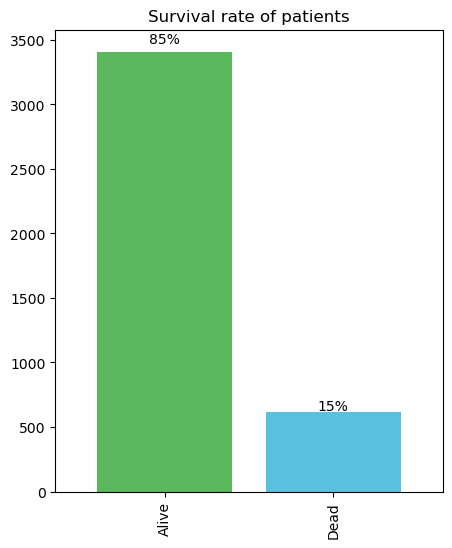

In [20]:
# status: What's the ratio of survival corresponding to these datas.
frequencies: int = tidy_data['status'].value_counts()
total_cases: int = frequencies.sum()

# fig, ax = plt.subplots()
colors_list = ['#5cb85c','#5bc0de','#d9534f']
ax = tidy_data['status'].value_counts().plot(kind='bar',figsize=(5,6), width=0.8, color=colors_list, edgecolor=None, title= "Survival rate of patients" )

# Add this loop to add the annotations
for p in ax.patches:

    width = p.get_width()
    height = p.get_height()

    x, y = p.get_xy()

    _ = ax.annotate(f'{(height / total_cases):.0%}', (x + width/2, y + height*1.02), ha='center')



---

#### Conclusion

- As we can see, luckily the frequency of the survival / recovery is much higher, than the mortality rate.

---

### Column: age
- Average age affected by breast cancer.

Text(0.5, 1.0, 'Average age of patients')

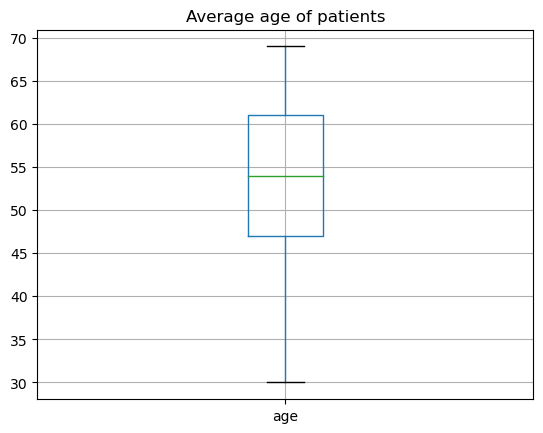

In [21]:
_ = tidy_data.loc[:, ['age']].boxplot()
plt.title("Average age of patients")

---

#### Conclusion
- The interquartile range of the affected ages are between age of 47 and age of 61.

---

### Column: tumor_size
- What is the distribution of the tumor sizes per "A stage" ("Regional" or "Distant") in this data set?

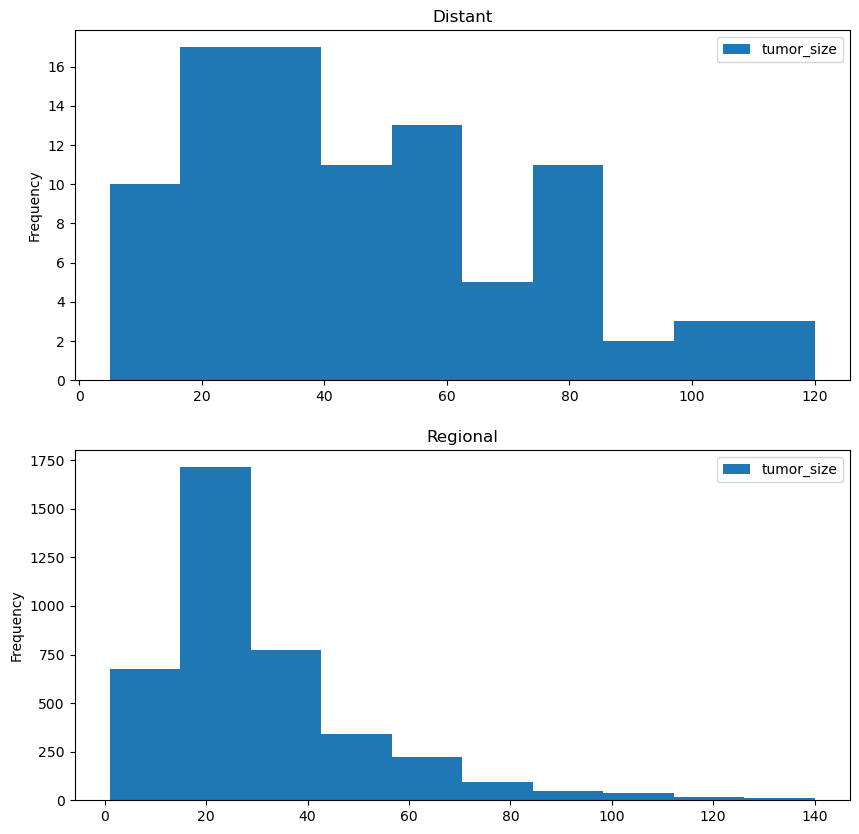

In [22]:
_ = tidy_data.plot.hist(column=["tumor_size"], by="a_stage", figsize=(10, 10))

---

#### Conclusion

- For the first sight, it looks like the Distant A stage vary in sizes, than the regional, but the maximum size is more or less the same. 
- The scatter in the variation of the distant types can be caused because of the metastatic cancer nature.

---

## b) Outliers: Are there any? If there are, can they be deleted? Because?

- In the boxplot of the ages, we couldn't see any outliers, so it was quiet regular, which unfortunately can mean that the breast cancer can affect woman in any age.
- But let's check the "tumor_size" column by the A stages.

Text(0.5, 1.0, 'Average size in regional stage')

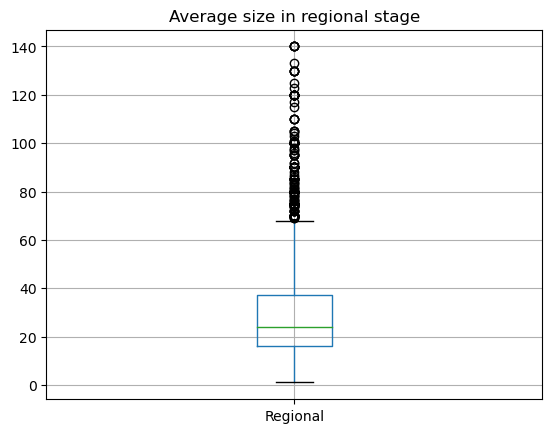

In [23]:
# tidy_data.loc[:, ['a_stage', 'tumor_size']].boxplot()
# Regional" or "Distant
tumor_sizes = pd.DataFrame()
# tumor_sizes['Distant']  = tidy_data.loc[(tidy_data['a_stage'] == 'Distant')]['tumor_size']
_ = tidy_data.loc[(tidy_data['a_stage'] == 'Regional')].loc[:, ['a_stage', 'tumor_size']].boxplot()
_ = plt.xticks([1], ['Regional'])
plt.title("Average size in regional stage")

Text(0.5, 1.0, 'Average size in distant stage')

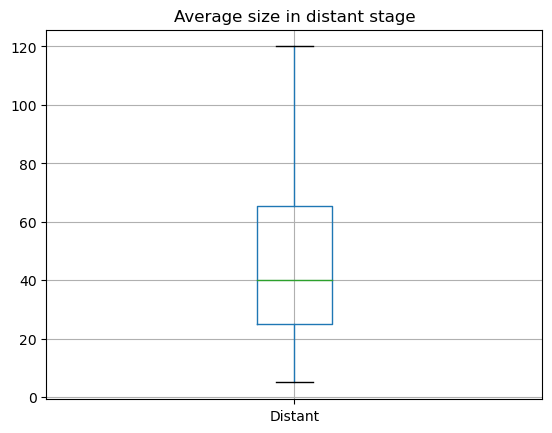

In [24]:
tidy_data.loc[(tidy_data['a_stage'] == 'Distant')].loc[:, ['a_stage', 'tumor_size']].boxplot()
_ = plt.xticks([1], ['Distant'])
plt.title("Average size in distant stage")

#### Conclusion
- The "Distant" A type of breast cancer hasn't got any outliers, so it means their sizes are more regularly distributed, but in contrary, the the "Regional" has various outliers, which together with the hist plot can mean that their sizes can or very small, or very large.

- I'd say that we should not delete them, because it would affect completely the dataset, and would stay too "regular". These outliers are giving us useful information.

## c) Inconsistencies: Are there any inconsistencies in the data? can it be fixed?

- For inconsistencies the best pair of columns are the "t_stage" and "tumor_size", 
so we will parse them and check if they matches.

In [25]:
# Look for inconsistencies between the the "t_stage" size categorization 
# and the "tumor_size" value.

def categorize_size_value(size: int) -> str:
    ''' Categorizes the given value (in mm) by the T Stage definitions.
        - T1 => Less than or equal to 20mm.
        - T2 => More than 20mm and less than 50mm.
        - T3 => More than 50mm.

        Returns the name of the category.
    '''

    eval_dict: dict[str, bool] = {
        'T1': size <= 20,
        'T2': 20 < size < 50,
        'T3': 50 < size
    }

    return list(eval_dict.keys())[list(eval_dict.values()).index(True)]

def parse_for_inconsistencies(data: pd.DataFrame) -> bool:
    ''' Compares the "t_stage" value and the recently evaluated value 
        in each register of the dataset.

        Return a list of indexes where inconsistencies are found.
    '''

    inconsistente_registers: list[int] = []
    
    for idx, series in data.iterrows():
        real_t_stage_value: str     = categorize_size_value(series['tumor_size'])
        recorded_t_stage_value: str = series['t_stage']

        if real_t_stage_value != recorded_t_stage_value:
            inconsistente_registers.append(idx)

        return inconsistente_registers

# Let's check the result if there are 
# any inconsistancies between the "t_stage" and the "tumor_size" columns.
print(parse_for_inconsistencies(tidy_data))

[]


- The "parse_for_inconsistencies" function has returned an empty list, which means that there aren't any inconsistencies have been found. In contrary case we should have deleted those registers, because the inconsistancy could have created lack of trust in the reliability of those datas.

- The only inconsistency I can think of that the cases haven't been recorded at the same stage
(time of the cancer development), so each case could be discovered at different advancement point.